<a href="https://colab.research.google.com/github/doctorpeppercokebear/DEEPLEANNING/blob/main/selective_search_n_iou_%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8_ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  selective search를 이용하여 Object Detection을 위한 Region Proposal 영역을 도출

#### selectivesearch를 설치하고 이미지를 로드

In [ ]:
!pip list

In [2]:
!pip install selectivesearch

  Preparing metadata (setup.py) ... done
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4335 sha256=b5bf261e834d343787f1e41704c09632e374d93fde08814441a972599838b306
  Stored in directory: /root/.cache/pip/wheels/0e/49/95/01447a4e0f48a135ac91fbdb1dd2a1c0523e40e29957b383a3
Successfully built selectivesearch


In [4]:
# data 폴더 생성 및 이미지 가져오기
!mkdir /content/data
!wget -O /content/data/audrey01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg

mkdir: cannot create directory ‘/content/data’: File exists
--2023-07-18 05:25:45--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/audrey01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30102 (29K) [image/jpeg]
Saving to: ‘/content/data/audrey01.jpg’

/content/data/audre 100%[===================>]  29.40K  --.-KB/s    in 0s      

2023-07-18 05:25:45 (78.5 MB/s) - ‘/content/data/audrey01.jpg’ saved [30102/30102]



In [5]:
!ls -alh ./data

total 40K
drwxr-xr-x 2 root root 4.0K Jul 18 05:25 .
drwxr-xr-x 1 root root 4.0K Jul 18 05:25 ..
-rw-r--r-- 1 root root  30K Jul 18 05:25 audrey01.jpg


image shpae: (450, 375, 3)


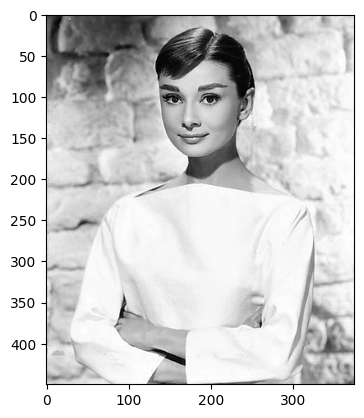

In [7]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os

### 오드리헵번 이미지를 cv2로 로드하고 matplotlib으로 시각화
img = cv2.imread('./data/audrey01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('image shpae:', img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

In [8]:
#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환
_, regions = selectivesearch.selective_search(img_rgb,
                                              scale=100,
                                              min_size=2000)

print(type(regions), len(regions))



<class 'list'> 41


In [9]:
 regions[0]

{'rect': (0, 0, 107, 167), 'size': 11166, 'labels': [0.0]}

#### 반환된 Region Proposal(후보 영역)에 대한 정보 보기.
반환된 regions 변수는 리스트 타입으로 세부 원소로 딕셔너리를 가지고 있음.
개별 딕셔너리내 KEY값별 의미
* rect 키값은 x,y 시작 좌표와 너비, 높이 값을 가지며 이 값이 Detected Object 후보를 나타내는 Bounding box임.
* size는 segment로 select된 Object의 크기
* labels는 해당 rect로 지정된 Bounding Box내에 있는 오브젝트들의 고유 ID
* 아래로 내려갈 수록 너비와 높이 값이 큰 Bounding box이며 하나의 Bounding box에 여러개의 오브젝트가 있을 확률이 커짐.

In [10]:
regions

[{'rect': (0, 0, 107, 167), 'size': 11166, 'labels': [0.0]},
 {'rect': (15, 0, 129, 110), 'size': 8771, 'labels': [1.0]},
 {'rect': (121, 0, 253, 133), 'size': 17442, 'labels': [2.0]},
 {'rect': (134, 17, 73, 62), 'size': 2713, 'labels': [3.0]},
 {'rect': (166, 23, 87, 176), 'size': 8639, 'labels': [4.0]},
 {'rect': (136, 53, 88, 121), 'size': 4617, 'labels': [5.0]},
 {'rect': (232, 79, 117, 147), 'size': 7701, 'labels': [6.0]},
 {'rect': (50, 91, 133, 123), 'size': 7042, 'labels': [7.0]},
 {'rect': (305, 97, 69, 283), 'size': 11373, 'labels': [8.0]},
 {'rect': (0, 161, 70, 46), 'size': 2363, 'labels': [9.0]},
 {'rect': (72, 171, 252, 222), 'size': 34467, 'labels': [10.0]},
 {'rect': (0, 181, 118, 85), 'size': 5270, 'labels': [11.0]},
 {'rect': (106, 210, 89, 101), 'size': 2868, 'labels': [12.0]},
 {'rect': (302, 228, 66, 96), 'size': 2531, 'labels': [13.0]},
 {'rect': (0, 253, 92, 134), 'size': 7207, 'labels': [14.0]},
 {'rect': (153, 270, 173, 179), 'size': 10360, 'labels': [15.0]},


In [14]:
# rect정보만 출력해서 보기
cand_rects = [cand['rect'] for cand in regions]
print(cand_rects)
print( len(cand_rects))

[(0, 0, 107, 167), (15, 0, 129, 110), (121, 0, 253, 133), (134, 17, 73, 62), (166, 23, 87, 176), (136, 53, 88, 121), (232, 79, 117, 147), (50, 91, 133, 123), (305, 97, 69, 283), (0, 161, 70, 46), (72, 171, 252, 222), (0, 181, 118, 85), (106, 210, 89, 101), (302, 228, 66, 96), (0, 253, 92, 134), (153, 270, 173, 179), (0, 305, 47, 139), (104, 312, 80, 71), (84, 360, 91, 67), (0, 362, 171, 87), (297, 364, 77, 85), (0, 91, 183, 175), (136, 23, 117, 176), (72, 171, 254, 278), (134, 17, 119, 182), (302, 97, 72, 283), (121, 0, 253, 226), (0, 91, 183, 175), (0, 0, 144, 167), (0, 0, 253, 199), (0, 253, 92, 191), (0, 91, 183, 353), (0, 171, 326, 278), (0, 97, 374, 352), (84, 312, 100, 115), (0, 91, 184, 353), (0, 91, 195, 353), (0, 0, 374, 444), (0, 0, 374, 449), (0, 0, 374, 449), (0, 0, 374, 449)]
41


**bounding box를 시각화 하기**

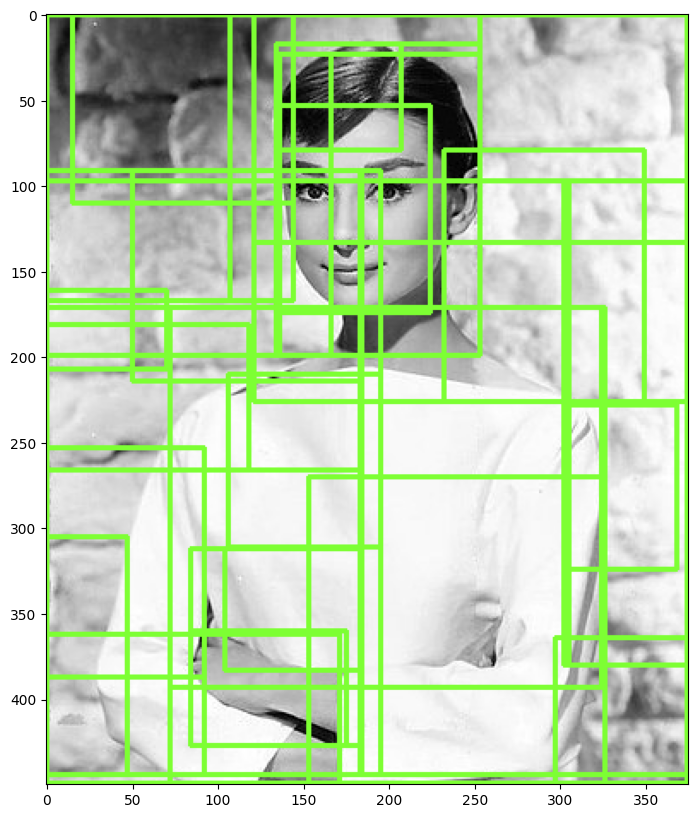

In [15]:
# opencv의 rectangle()을 이용하여 시각화
# rectangle()은 이미지와 좌상단 좌표, 우하단 좌표, box컬러색, 두께등을 인자로 입력하면 원본 이미지에 box를 그려줌.
green_rgb = (125, 255, 51)
img_rgb_copy = img_rgb.copy()
for rect in cand_rects:
  left = rect[0]
  top = rect[1]
    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함.
  right = left + rect[2]
  bottom = top + rect[3]
  img_rgb_copy = cv2.rectangle(img_rgb_copy, (left, top), (right, bottom),
                               color=green_rgb, thickness=2)

plt.figure(figsize=(10,10))
plt.imshow(img_rgb_copy)
plt.show()

#### bounding box의 크기가 큰 후보만 추출

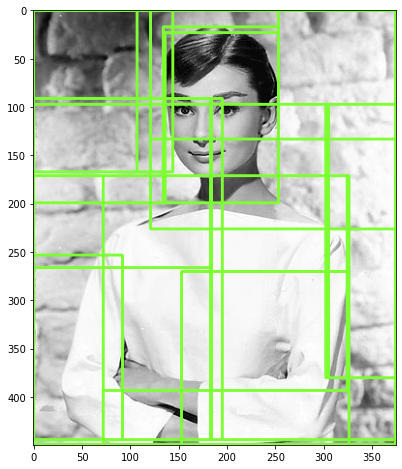

In [ ]:

    # rect[2], rect[3]은 너비와 높이이므로 우하단 좌표를 구하기 위해 좌상단 좌표에 각각을 더함.


### IOU 구하기

#### 입력인자로 후보 박스와 실제 박스를 받아서 IOU를 계산하는 함수 생성

In [ ]:


    # Calculate intersection areas




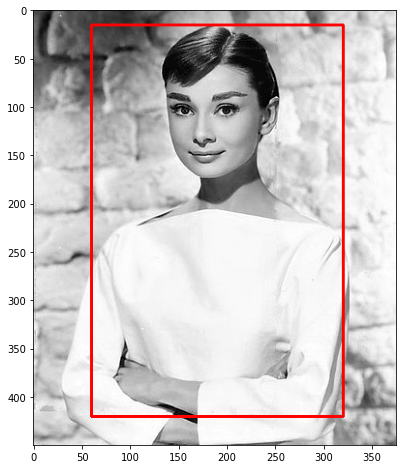

In [ ]:


# 실제 box(Ground Truth)의 좌표를 아래와 같다고 가정.


In [ ]:


#selectivesearch.selective_search()는 이미지의 Region Proposal정보를 반환


<class 'list'> 41


index: 0 iou: 0.06157293686705451
index: 1 iou: 0.07156308851224105
index: 2 iou: 0.2033654637255666
index: 3 iou: 0.04298195631528965
index: 4 iou: 0.14541310541310543
index: 5 iou: 0.10112060778727446
index: 6 iou: 0.11806905615946989
index: 7 iou: 0.1420163334272036
index: 8 iou: 0.035204259342190375
index: 9 iou: 0.004256894317971497
index: 10 iou: 0.5184766640298338
index: 11 iou: 0.04465579710144928
index: 12 iou: 0.0853656220322887
index: 13 iou: 0.015722240419259743
index: 14 iou: 0.037833068643021
index: 15 iou: 0.22523535071077264
index: 16 iou: 0.0
index: 17 iou: 0.053941120607787274
index: 18 iou: 0.05154006626579948
index: 19 iou: 0.05660327592118798
index: 20 iou: 0.01165009904393209
index: 21 iou: 0.18588082901554404
index: 22 iou: 0.19555555555555557
index: 23 iou: 0.5409250175192712
index: 24 iou: 0.205679012345679
index: 25 iou: 0.042245111210628454
index: 26 iou: 0.34848824374009246
index: 27 iou: 0.18588082901554404
index: 28 iou: 0.10952135872362326
index: 29 iou: 

[(0, 0, 107, 167),
 (0, 0, 144, 167),
 (0, 0, 253, 199),
 (0, 0, 374, 444),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 0, 374, 449),
 (0, 91, 183, 175),
 (0, 91, 183, 175),
 (0, 91, 183, 353),
 (0, 91, 184, 353),
 (0, 91, 195, 353),
 (0, 97, 374, 352),
 (0, 171, 326, 278),
 (0, 181, 118, 85),
 (0, 253, 92, 134),
 (0, 253, 92, 191),
 (0, 362, 171, 87),
 (15, 0, 129, 110),
 (50, 91, 133, 123),
 (72, 171, 252, 222),
 (72, 171, 254, 278),
 (84, 312, 100, 115),
 (121, 0, 253, 133),
 (121, 0, 253, 226),
 (134, 17, 119, 182),
 (136, 23, 117, 176),
 (153, 270, 173, 179),
 (166, 23, 87, 176),
 (232, 79, 117, 147),
 (297, 364, 77, 85),
 (302, 97, 72, 283),
 (305, 97, 69, 283)]

img shape: (450, 375, 3)
index: 8 iou: 0.5184766640298338 rectangle: (72, 171, 324, 393)
index: 18 iou: 0.5409250175192712 rectangle: (72, 171, 326, 449)
index: 28 iou: 0.5490037131949166 rectangle: (0, 97, 374, 449)
index: 32 iou: 0.6341234282410753 rectangle: (0, 0, 374, 444)
index: 33 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 34 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)
index: 35 iou: 0.6270619201314865 rectangle: (0, 0, 374, 449)


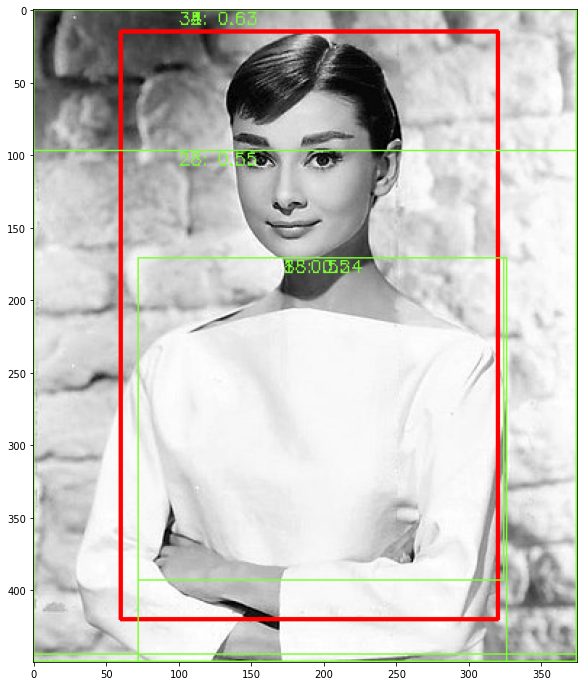